In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2
import fiftyone as fo
import fiftyone.zoo as foz
from fiftyone import ViewField as F

In [2]:
dataset = fo.Dataset.from_images_dir("/Users/arihant/Desktop/Py/pishu/duplicate/content/101D3200")

 100% |███████████████████| 41/41 [16.7ms elapsed, 0s remaining, 2.5K samples/s]      


In [3]:
session=fo.launch_app(dataset)

In [4]:
# face_locations=[]
# for img in dataset:
#     x = np.array(Image.open(img.filepath))
#     face_locations.append(face_recognition.face_locations(x))
# # face_locations= dataset.

In [5]:
# face_locations

In [6]:
# dict={}
# i = 0
# while i < 5:
#     for img in dataset:
#         faces=[]
#         x=(np.array(Image.open(img.filepath))).tolist()
#         faces.append(face_recognition.face_locations(x))
#         dict[x].append(faces)
#     i += 1

In [7]:
# dict

In [8]:
# dict = {'image':[], 'faces':[]}
# for img in dataset:
#     x = np.array(Image.open(img.filepath))
#     dict['image'].append(img)
#     dict['faces'].append(face_recognition.face_locations(x))

In [9]:
# dict

In [10]:
# for i in face_locations:
#     print(i)

In [6]:
##preprocessing
def preprocess(face_image):
    face_image = cv2.resize(face_image, (48,48))
    face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
    face_image = np.reshape(face_image, [1, face_image.shape[0], face_image.shape[1], 1])
    return face_image
    

In [7]:
model = load_model("/Users/arihant/Desktop/Py/pishu/emo/model_v6_23.hdf5")

In [8]:
emotion_dict= {'Angry': 0, 'Sad': 5, 'Neutral': 4, 'Disgust': 1, 'Surprise': 6, 'Fear': 2, 'Happy': 3}

In [14]:
# faces = []
# # count = 1
# for pic in face_locations:
#     for face in pic:
#         top, right, bottom, left = face
#         # face_image = pic[top:bottom, left:right]
#         print(pic)

In [ ]:
# face_locations=[]
# for img in dataset:
#     x = np.array(Image.open(img.filepath))
#     face_locations.append(face_recognition.face_locations(x))

1/1 [==============================] - 0s 14ms/step
Happy
1/1 [==============================] - 0s 11ms/step
Surprise
1/1 [==============================] - 0s 15ms/step
Fear
1/1 [==============================] - 0s 11ms/step
Happy
1/1 [==============================] - 0s 14ms/step
Happy
1/1 [==============================] - 0s 14ms/step
Happy
1/1 [==============================] - 0s 12ms/step
Happy
1/1 [==============================] - 0s 13ms/step
Happy
1/1 [==============================] - 0s 12ms/step
Happy
1/1 [==============================] - 0s 12ms/step
Happy
1/1 [==============================] - 0s 11ms/step
Happy


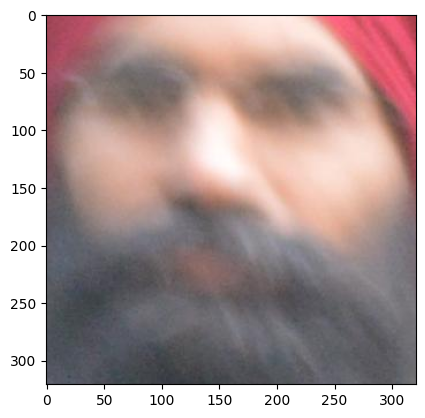

In [19]:
inputimage = face_recognition.load_image_file("/Users/arihant/Desktop/Py/pishu/duplicate/content/101D3200/DSC_1681.JPG")
# image_array = np.array(inputimage)
# plt.imshow(image_array)
face_locations=face_recognition.face_locations(inputimage)
c=1
for face in face_locations:
    top, right, bottom, left = face
    face_image = inputimage[top:bottom, left:right]
    plt.imshow(face_image)
    face_image_img=Image.fromarray(face_image)
    face_image_img.save("image_{0}.jpg".format(c))
    face_image_cv=cv2.imread("image_{0}.jpg".format(c))
    plt.imshow(face_image_cv[:, :, : : -1])
    img_proc= preprocess(face_image_cv)
    predicted_class = np.argmax(model.predict(img_proc))
    label_map = dict((v,k) for k,v in emotion_dict.items()) 
    predicted_label = label_map[predicted_class]
    print(predicted_label)
    c+=1
    # image_save = Image.fromarray(face_image)

TypeError: Can't convert object to 'str' for 'filename'

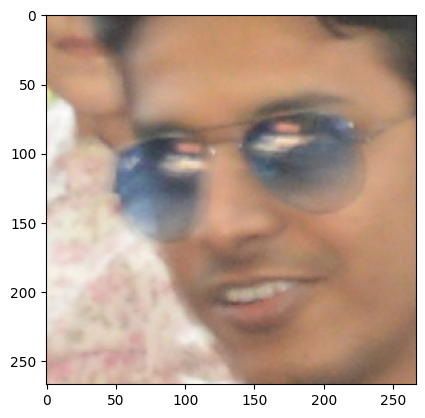

In [14]:
# # faces=[]
# face_locations=[]
# count=1
# for pic in dataset:
#         x = np.array(Image.open(pic.filepath))
#         face_locations=face_recognition.face_locations(x)
#         # while(count<2):
#         for face in face_locations:
#                 top, right, bottom, left = face
#                 # print(face)
#                 pic_fr=face_recognition.load_image_file(pic.filepath)
#                 face_image = pic_fr[top:bottom, left:right]
#                 plt.imshow(face_image)
#                 face_image_img=Image.fromarray(face_image)
#                 face_image_cv=cv2.imread(face_image_img)
#                 plt.imshow(face_image_cv[:, :, : : -1])
#                 img_proc=preprocess(face_image_cv)
#                 predicted_class = np.argmax(model.predict(img_proc))
#                 label_map = dict((v,k) for k,v in emotion_dict.items()) 
#                 predicted_label = label_map[predicted_class]
#                 print(predicted_label)
#                 # count=count+1
